In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("train.txt"
                       ,header = None)
df.columns = ['text']

In [3]:
df.head()

,text
0,i didnt feel humiliated;sadness
1,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wro...
3,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy;anger


In [4]:
df['mood']=df['text'].str.split(';').str[1]
df['text']=df['text'].str.split(';').str[0]
df.head()

,text,mood
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [5]:
def generate_id(s):
    return abs(hash(s)) % (10 ** 10)

df['textID'] = df['text'].apply(generate_id)
# df['textID'] = df[['text', 'sentiment']].sum(axis=1).map(hash)

In [6]:
df.shape

(16000, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   mood    16000 non-null  object
 2   textID  16000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 375.1+ KB


In [8]:
df.mood.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [9]:
def set_value(row_number, assigned_value):
    return assigned_value[row_number]

sen_dic ={'sadness' : 'negative', 'anger' : 'negative', 'fear' : 'negative','love' : 'positive','joy':'positive','surprise':'positive'}
df['sentiment'] = df['mood'].apply(set_value, args =(sen_dic, ))

In [10]:
df

,text,mood,textID,sentiment
0,i didnt feel humiliated,sadness,522150281,negative
1,i can go from feeling so hopeless to so damned...,sadness,6436970935,negative
2,im grabbing a minute to post i feel greedy wrong,anger,9166060804,negative
3,i am ever feeling nostalgic about the fireplac...,love,9656956790,positive
4,i am feeling grouchy,anger,7113542146,negative
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,2960141300,negative
15996,i am now turning and i feel pathetic that i am...,sadness,2926024946,negative
15997,i feel strong and good overall,joy,9054632177,positive
15998,i feel like this was such a rude comment and i...,anger,9047251872,negative


In [13]:
test = np.array(df)

In [11]:
!cp -r  /content/drive/My\Drive/BERT_SENTIMENT /content/

In [12]:
cd /content/BERT_SENTIMENT/

/content/BERT_SENTIMENT


In [25]:
import json
def do_qa_test(test):
    output = []
    for line in test:
        context = line[0]
        qas = []
        question = line[-1]
        qid = line[2]
        if type(context) != str or type(question) != str:
            print(context, type(context))
            print(answer, type(answer))
            print(question, type(question))
            continue
        answers = []
        answers.append({'answer_start': 1000000, 'text': '__None__'})
        qas.append({'question': question, 'id': qid, 'is_impossible': False, 'answers': answers})
        output.append({'context': context.lower(), 'qas': qas})
    return output

qa_test = do_qa_test(test)

with open('test.json', 'w') as outfile:
    json.dump(qa_test, outfile)

In [15]:
import torch

In [17]:
!pip install transformers


In [16]:
!pip install simpletransformers

     |████████████████████████████████| 221 kB 5.3 MB/s 
     |████████████████████████████████| 270 kB 36.0 MB/s 
     |████████████████████████████████| 3.3 MB 40.8 MB/s 
     |████████████████████████████████| 8.0 MB 496 kB/s 
     |████████████████████████████████| 1.7 MB 35.8 MB/s 
     |████████████████████████████████| 1.2 MB 35.7 MB/s 
     |████████████████████████████████| 124 kB 48.1 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
     |████████████████████████████████| 2.8 MB 21.7 MB/s 
     |████████████████████████████████| 52 kB 1.6 MB/s 
     |████████████████████████████████| 636 kB 49.9 MB/s 
     |████████████████████████████████| 895 kB 30.0 MB/s 
     |████████████████████████████████| 180 kB 31.4 MB/s 
     |████████████████████████████████| 97 kB 6.9 MB/s 
     |████████████████████████████████| 133 kB 48.2 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 119 kB 46.3 MB/s 
     |██████████████████

In [18]:
import os
import keras
from transformers import  DistilBertTokenizer, DistilBertForQuestionAnswering
# tokenizer = DistilBertTokenizer.from_pretrained('/content/model')
# model = DistilBertForQuestionAnswering.from_pretrained('/content/model')
MODEL_PATH='/content/BERT_SENTIMENT'

In [32]:
from simpletransformers.question_answering import QuestionAnsweringModel
model1 = QuestionAnsweringModel('distilbert', 
                               MODEL_PATH, 
                                    use_cuda=True
                              )

In [ ]:
predictions = model1.predict(qa_test)
predictions_df = pd.DataFrame.from_dict(predictions)


In [74]:
predictions_df=predictions_df.iloc[0].apply(pd.Series)

In [78]:
predictions_df['selected_text'] = predictions_df.answer.apply(lambda x: x[0])

In [79]:
predictions_df

,id,answer,selected_text
0,522150281,"[i didnt feel humiliated, humiliated, didnt fe...",i didnt feel humiliated
1,6436970935,"[hopeless, i can go from feeling so hopeless, ...",hopeless
2,9166060804,"[i feel greedy wrong, greedy wrong, im grabbin...",i feel greedy wrong
3,9656956790,"[nostalgic, i am ever feeling nostalgic, nosta...",nostalgic
4,7113542146,"[i am feeling grouchy, grouchy, feeling grouch...",i am feeling grouchy
...,...,...,...
15964,2960141300,"[beaten up, beaten, i feel like i have been be...",beaten up
15965,2926024946,"[pathetic, pathetic that, i am now turning and...",pathetic
15966,9054632177,"[i feel strong and good overall, good overall,...",i feel strong and good overall
15967,9047251872,[i feel like this was such a rude comment and ...,i feel like this was such a rude comment and i...


In [80]:
df['selected_text']=predictions_df['selected_text']

In [82]:
df.head()

,text,mood,textID,sentiment,selected_text
0,i didnt feel humiliated,sadness,522150281,negative,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,6436970935,negative,hopeless
2,im grabbing a minute to post i feel greedy wrong,anger,9166060804,negative,i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,9656956790,positive,nostalgic
4,i am feeling grouchy,anger,7113542146,negative,i am feeling grouchy


In [84]:
df.to_csv('train.csv', index=False)

In [94]:
cd /content/BERT_SENTIMENT/

/content/BERT_SENTIMENT


In [93]:
df = pd.read_csv("val.txt"
                       ,header = None)
df.columns = ['text']
df['mood']=df['text'].str.split(';').str[1]
df['text']=df['text'].str.split(';').str[0]
def generate_id(s):
    return abs(hash(s)) % (10 ** 10)

df['textID'] = df['text'].apply(generate_id)
def set_value(row_number, assigned_value):
    return assigned_value[row_number]

sen_dic ={'sadness' : 'negative', 'anger' : 'negative', 'fear' : 'negative','love' : 'positive','joy':'positive','surprise':'positive'}
df['sentiment'] = df['mood'].apply(set_value, args =(sen_dic, ))
test = np.array(df)

In [95]:
import json
def do_qa_test(test):
    output = []
    for line in test:
        context = line[0]
        qas = []
        question = line[-1]
        qid = line[2]
        if type(context) != str or type(question) != str:
            print(context, type(context))
            print(answer, type(answer))
            print(question, type(question))
            continue
        answers = []
        answers.append({'answer_start': 1000000, 'text': '__None__'})
        qas.append({'question': question, 'id': qid, 'is_impossible': False, 'answers': answers})
        output.append({'context': context.lower(), 'qas': qas})
    return output

qa_test = do_qa_test(test)

with open('test.json', 'w') as outfile:
    json.dump(qa_test, outfile)

In [96]:
predictions = model1.predict(qa_test)
predictions_df = pd.DataFrame.from_dict(predictions)
predictions_df=predictions_df.iloc[0].apply(pd.Series)
predictions_df['selected_text'] = predictions_df.answer.apply(lambda x: x[0])
df['selected_text']=predictions_df['selected_text']
df.to_csv('val.csv', index=False)

add example index and unique id: 100%|██████████| 2000/2000 [00:00<00:00, 333092.76it/s]


Running Prediction:   0%|          | 0/250 [00:00<?, ?it/s]

In [5]:
train_df=pd.read_csv("train.csv")
val_df=pd.read_csv("val.csv")

In [4]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')

# text preprocessing
from nltk.tokenize import word_tokenize
import re

# plots and metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# preparing input to our model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# keras layers
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, GRU, Dense

In [6]:
num_classes = 6

embed_num_dims = 300
max_seq_len = 500

class_names = ['joy', 'fear', 'anger', 'sadness', 'love','surprise']

In [8]:
X_train = train_df.text
X_test = val_df.text

y_train = train_df.mood
y_test = val_df.mood

data = train_df.append(val_df, ignore_index=True)

In [13]:
print(data.mood.value_counts())
data.head()

joy         6066
sadness     5216
anger       2434
fear        2149
love        1482
surprise     653
Name: mood, dtype: int64


,text,mood,textID,sentiment,selected_text
0,i didnt feel humiliated,sadness,522150281,negative,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,6436970935,negative,hopeless
2,im grabbing a minute to post i feel greedy wrong,anger,9166060804,negative,i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,9656956790,positive,nostalgic
4,i am feeling grouchy,anger,7113542146,negative,i am feeling grouchy


In [10]:
def clean_text(data):
    
    data = re.sub(r"(#[\d\w\.]+)", '', data)
    data = re.sub(r"(@[\d\w\.]+)", '', data)
    
    data = word_tokenize(data)
    
    return data

In [16]:
texts = [' '.join(clean_text(Text)) for Text in data.text]

texts_train = [' '.join(clean_text(Text)) for Text in X_train]
texts_test = [' '.join(clean_text(Text)) for Text in X_test]

In [18]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

sequence_train = tokenizer.texts_to_sequences(texts_train)
sequence_test = tokenizer.texts_to_sequences(texts_test)

index_of_words = tokenizer.word_index


vocab_size = len(index_of_words) + 1

print('Number of unique words: {}'.format(len(index_of_words)))

Number of unique words: 16194


In [19]:
X_train_pad = pad_sequences(sequence_train, maxlen = max_seq_len )
X_test_pad = pad_sequences(sequence_test, maxlen = max_seq_len )

X_train_pad

array([[   0,    0,    0, ...,  140,    2,  657],
       [   0,    0,    0, ...,    3,   21, 1305],
       [   0,    0,    0, ...,    2,  520,  454],
       ...,
       [   0,    0,    0, ...,    3,  102, 1275],
       [   0,    0,    0, ...,  354,    8,   42],
       [   0,    0,    0, ...,   25, 3826,   12]], dtype=int32)

In [21]:
encoding = {
    'joy': 0,
    'fear': 1,
    'anger': 2,
    'sadness': 3,
    'love': 4,
    'surprise':5,

}


y_train = [encoding[x] for x in train_df.mood]
y_test = [encoding[x] for x in val_df.mood]

In [22]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

In [23]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]
    return embedding_matrix

In [24]:
import urllib.request
import zipfile
import os

fname = 'embeddings/wiki-news-300d-1M.vec'

if not os.path.isfile(fname):
    print('Downloading word vectors...')
    urllib.request.urlretrieve('https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip',
                              'wiki-news-300d-1M.vec.zip')
    print('Unzipping...')
    with zipfile.ZipFile('wiki-news-300d-1M.vec.zip', 'r') as zip_ref:
        zip_ref.extractall('embeddings')
    print('done.')
    
    os.remove('wiki-news-300d-1M.vec.zip')

Unzipping...
done.


In [25]:
embedd_matrix = create_embedding_matrix(fname, index_of_words, embed_num_dims)
embedd_matrix.shape

(16195, 300)

In [26]:
new_words = 0

for word in index_of_words:
    entry = embedd_matrix[index_of_words[word]]
    if all(v == 0 for v in entry):
        new_words = new_words + 1

print('Words found in wiki vocab: ' + str(len(index_of_words) - new_words))
print('New words found: ' + str(new_words))

Words found in wiki vocab: 15039
New words found: 1155


In [27]:
embedd_layer = Embedding(vocab_size,
                         embed_num_dims,
                         input_length = max_seq_len,
                         weights = [embedd_matrix],
                         trainable=False)

In [28]:
gru_output_size = 128
bidirectional = True


model = Sequential()
model.add(embedd_layer)

if bidirectional:
    model.add(Bidirectional(GRU(units=gru_output_size,
                              dropout=0.2,
                              recurrent_dropout=0.2)))
else:
     model.add(GRU(units=gru_output_size,
                dropout=0.2, 
                recurrent_dropout=0.2))

model.add(Dense(num_classes, activation='softmax'))

In [29]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 300)          4858500   
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               330240    
_________________________________________________________________
dense (Dense)                (None, 6)                 1542      
Total params: 5,190,282
Trainable params: 331,782
Non-trainable params: 4,858,500
_________________________________________________________________


In [30]:
batch_size = 128
epochs = 15

hist = model.fit(X_train_pad, y_train, 
                 batch_size=batch_size,
                 epochs=epochs,
                 validation_data=(X_test_pad,y_test))

Epoch 1/15
125/125 [==============================] - 224s 2s/step - loss: 1.3942 - accuracy: 0.4658 - val_loss: 1.1421 - val_accuracy: 0.5905
Epoch 2/15
125/125 [==============================] - 221s 2s/step - loss: 0.8373 - accuracy: 0.7106 - val_loss: 0.5905 - val_accuracy: 0.7935
Epoch 3/15
125/125 [==============================] - 219s 2s/step - loss: 0.4965 - accuracy: 0.8264 - val_loss: 0.3373 - val_accuracy: 0.8820
Epoch 4/15
125/125 [==============================] - 222s 2s/step - loss: 0.3264 - accuracy: 0.8833 - val_loss: 0.2395 - val_accuracy: 0.9200
Epoch 5/15
125/125 [==============================] - 223s 2s/step - loss: 0.2503 - accuracy: 0.9099 - val_loss: 0.2085 - val_accuracy: 0.9230
Epoch 6/15
125/125 [==============================] - 221s 2s/step - loss: 0.2219 - accuracy: 0.9184 - val_loss: 0.1787 - val_accuracy: 0.9260
Epoch 7/15
125/125 [==============================] - 223s 2s/step - loss: 0.2046 - accuracy: 0.9216 - val_loss: 0.1612 - val_accuracy: 0.9315

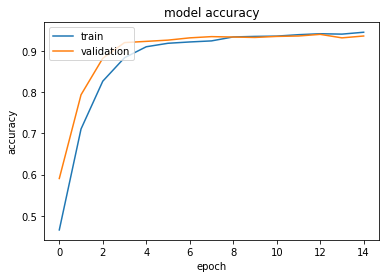

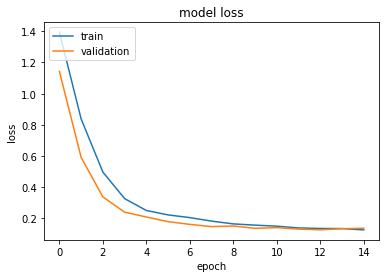

In [33]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [34]:
model.save('sentmodel.h5')

In [36]:
message = ['im feeling rather rotten so im not very ambitious right now']

seq = tokenizer.texts_to_sequences(message)
padded = pad_sequences(seq, maxlen=max_seq_len)

pred = model.predict(padded)

print('Message: ' + str(message))
print('predicted: {} '.format(class_names[np.argmax(pred)]))

Message: ['im feeling rather rotten so im not very ambitious right now']
predicted: sadness 


In [37]:
message = ['i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived']

seq = tokenizer.texts_to_sequences(message)
padded = pad_sequences(seq, maxlen=max_seq_len)

pred = model.predict(padded)

print('Message: ' + str(message))
print('predicted: {} '.format(class_names[np.argmax(pred)]))

Message: ['i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived']
predicted: joy 
